In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoLarsCV

In [2]:
data = pd.read_csv('Avocado.csv', index_col='Unnamed: 0')
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df = data[(data['region']=='Orlando') & (data['type']=='conventional')]
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,0.99,305773.54,211102.90,20765.29,124.04,73781.31,40641.55,33139.76,0.00,conventional,2015,Orlando
1,2015-12-20,1.21,200074.81,131152.60,15794.56,122.07,53005.58,36258.03,16747.55,0.00,conventional,2015,Orlando
2,2015-12-13,0.96,310101.52,217679.37,24260.86,168.63,67992.66,31407.15,36585.51,0.00,conventional,2015,Orlando
3,2015-12-06,1.20,199063.82,135222.96,21555.66,121.93,42163.27,24098.62,18064.65,0.00,conventional,2015,Orlando
4,2015-11-29,0.96,262683.80,190361.54,21007.77,37.82,51276.67,21536.82,29739.85,0.00,conventional,2015,Orlando
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,0.99,759532.37,511953.91,60712.96,1345.00,185520.50,88148.10,97195.73,176.67,conventional,2018,Orlando
8,2018-01-28,1.35,414781.12,262391.05,28265.08,1290.40,122834.59,75243.30,47547.96,43.33,conventional,2018,Orlando
9,2018-01-21,1.16,482904.74,312991.46,36478.07,1521.70,131913.51,72049.51,59856.21,7.79,conventional,2018,Orlando
10,2018-01-14,1.40,387588.47,258150.99,26672.33,1199.66,101565.49,68412.96,33152.53,0.00,conventional,2018,Orlando


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.drop(columns = ['region', 'type'])

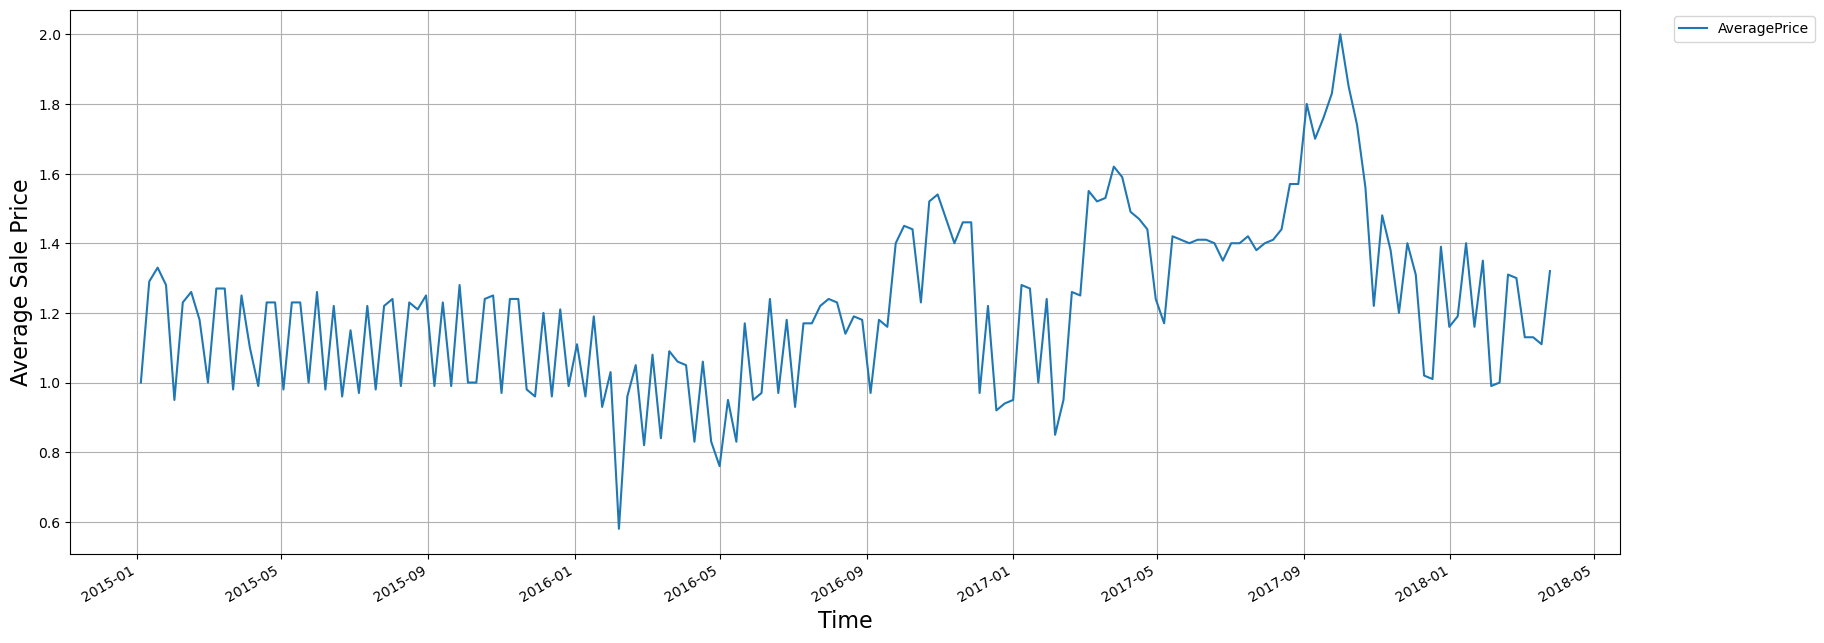

In [5]:
df.set_index('Date').AveragePrice.plot(figsize = (20,8))

plt.legend(bbox_to_anchor=(1.03,1), loc='upper left')
plt.xlabel("Time", fontsize = 16)
plt.ylabel("Average Sale Price", fontsize = 16)
plt.grid(True)
plt.show()

In [6]:
df_week = df.copy()
df_week['Date'] = pd.to_datetime(df_week['Date'])
df_week = df_week.groupby('Date')['AveragePrice'].mean()
df_week

Date
2015-01-04    1.00
2015-01-11    1.29
2015-01-18    1.33
2015-01-25    1.28
2015-02-01    0.95
              ... 
2018-02-25    1.30
2018-03-04    1.13
2018-03-11    1.13
2018-03-18    1.11
2018-03-25    1.32
Name: AveragePrice, Length: 169, dtype: float64

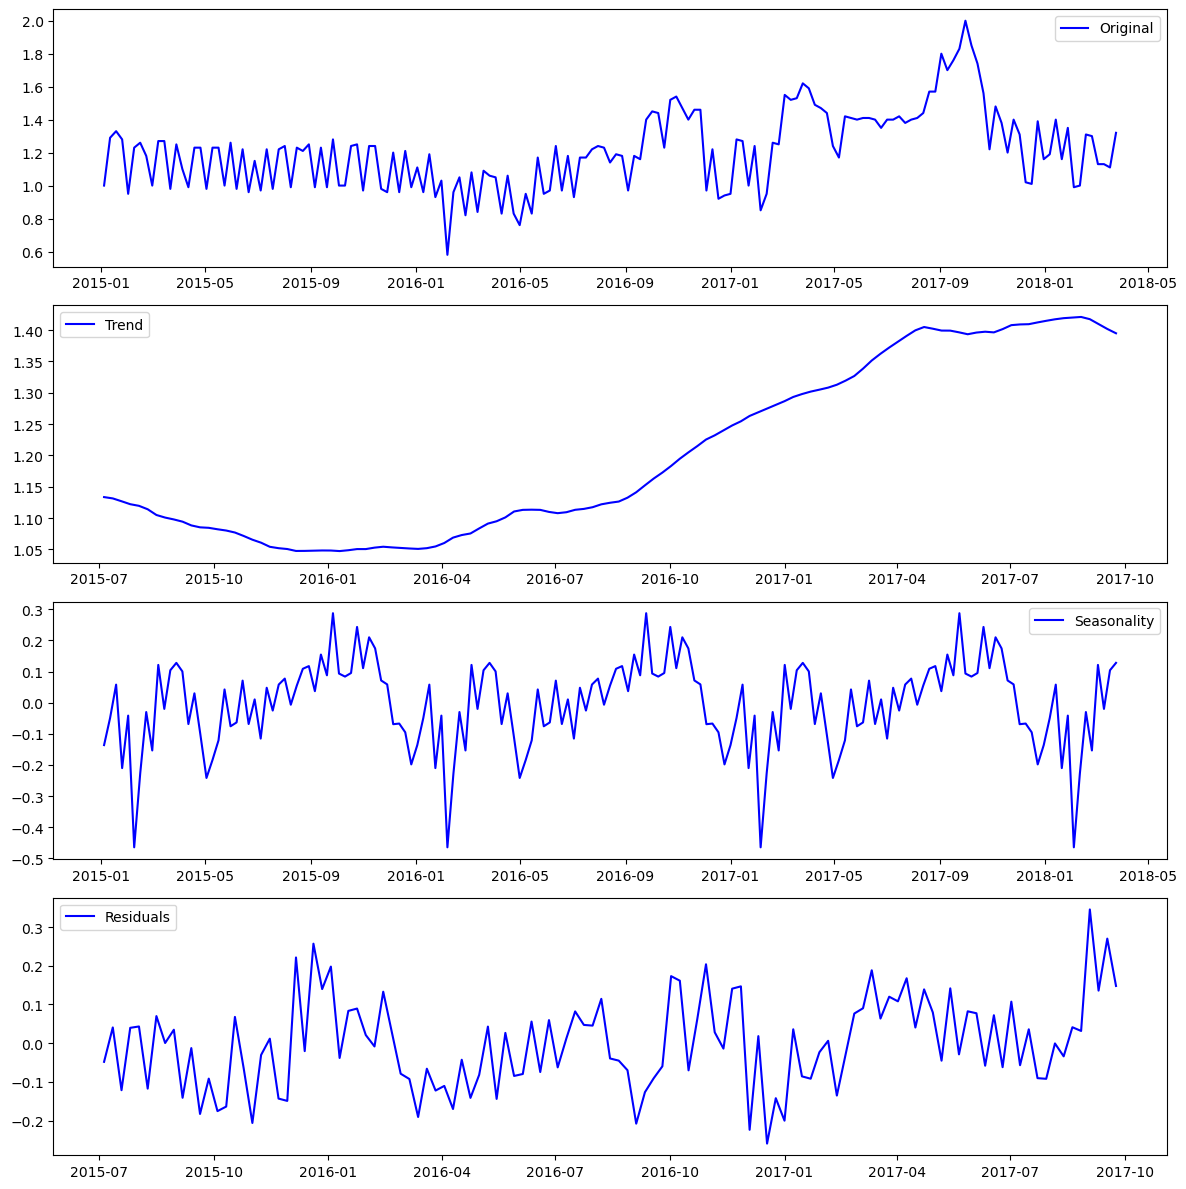

In [7]:
decomposition = sm.tsa.seasonal_decompose(df_week, model='additive')

#Gather the trend, seasonality, and residuals
trend_week = decomposition.trend
seasonal_week = decomposition.seasonal
residual_week = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,12))
plt.subplot(411)
plt.plot(df_week, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_week, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_week,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_week, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [8]:
df_month = df.copy()
df_month['Date'] = df_month['Date'].dt.strftime('%Y-%m')
df_month['Date'] = pd.to_datetime(df_month['Date'])
df_month = df_month.groupby('Date')['AveragePrice'].mean()
df_month

Date
2015-01-01    1.2250
2015-02-01    1.1550
2015-03-01    1.1540
2015-04-01    1.1375
2015-05-01    1.1400
2015-06-01    1.0775
2015-07-01    1.0975
2015-08-01    1.1840
2015-09-01    1.1225
2015-10-01    1.1225
2015-11-01    1.0780
2015-12-01    1.0900
2016-01-01    1.0440
2016-02-01    0.8525
2016-03-01    1.0175
2016-04-01    0.9425
2016-05-01    0.9320
2016-06-01    1.0900
2016-07-01    1.1460
2016-08-01    1.1850
2016-09-01    1.1775
2016-10-01    1.4360
2016-11-01    1.4475
2016-12-01    1.0125
2017-01-01    1.1480
2017-02-01    1.0775
2017-03-01    1.5550
2017-04-01    1.4460
2017-05-01    1.3500
2017-06-01    1.3925
2017-07-01    1.4000
2017-08-01    1.4975
2017-09-01    1.7725
2017-10-01    1.6740
2017-11-01    1.3650
2017-12-01    1.1780
2018-01-01    1.2750
2018-02-01    1.1500
2018-03-01    1.1725
Name: AveragePrice, dtype: float64

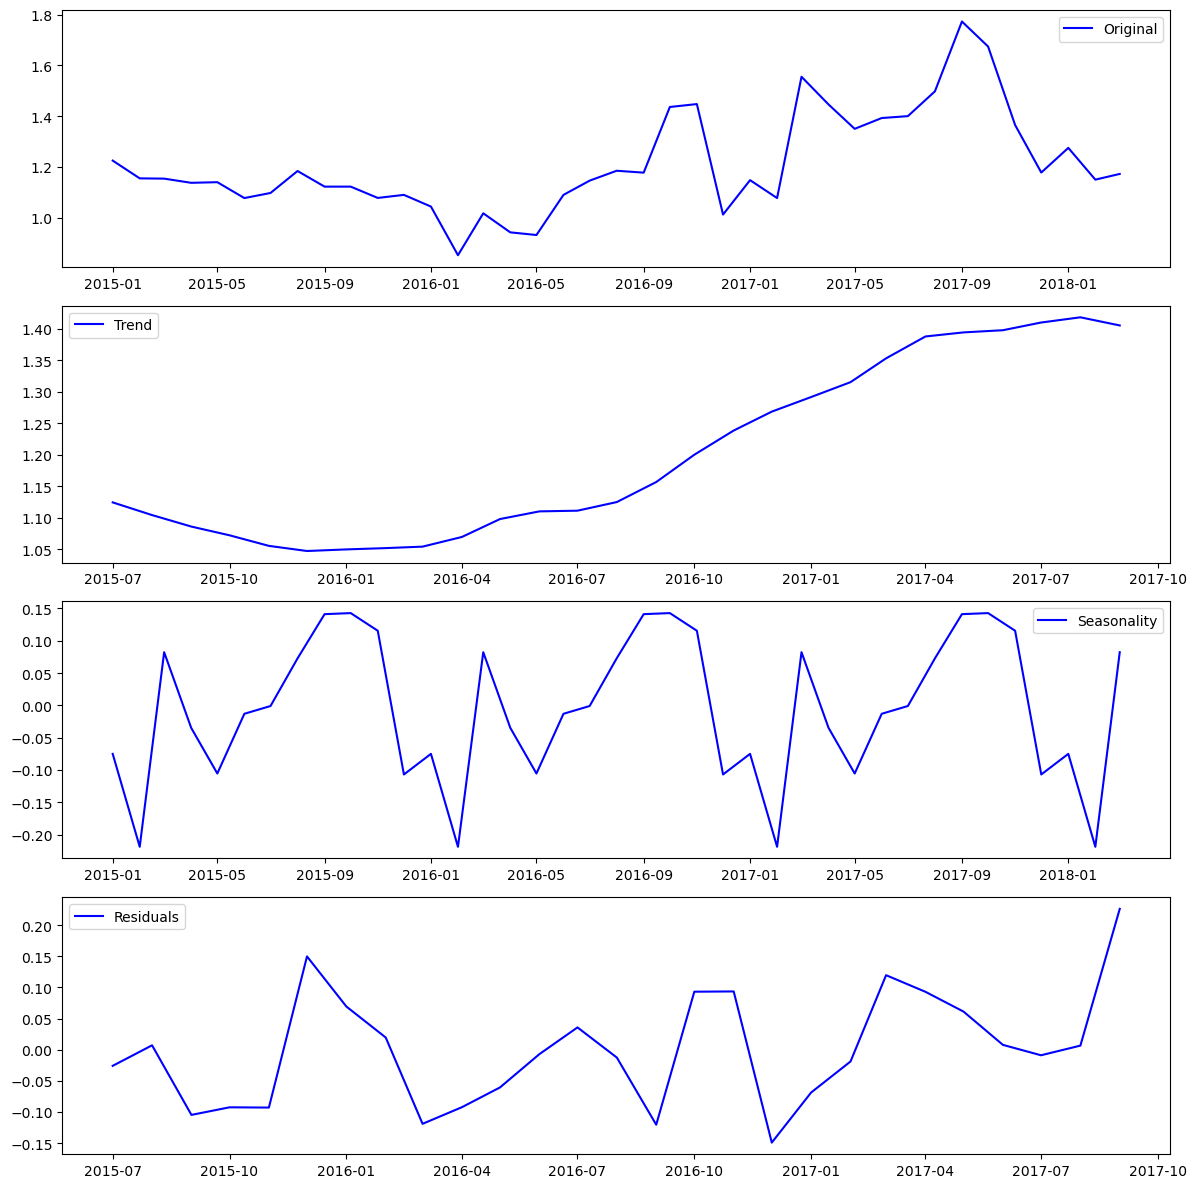

In [9]:
decomposition = sm.tsa.seasonal_decompose(df_month, model='additive')

#Gather the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,12))
plt.subplot(411)
plt.plot(df_month, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [10]:
df_quarter = df.copy()
df_quarter['Date'] = pd.to_datetime(df_quarter['Date'])
df_quarter['Quarter'] = df_quarter['Date'].dt.quarter
df_quarter['Year'] = df_quarter['Date'].dt.year
df_quarter['YearQuarter'] = df_quarter['Year'].astype(str) + '-Q' + df_quarter['Quarter'].astype(str)
df_quarter['YearQuarter'] = pd.to_datetime(df_quarter['YearQuarter'])
df_quarter = df_quarter.groupby('YearQuarter')['AveragePrice'].mean()
df_quarter

YearQuarter
2015-01-01    1.176154
2015-04-01    1.120000
2015-07-01    1.138462
2015-10-01    1.095385
2016-01-01    0.976923
2016-04-01    0.983846
2016-07-01    1.167692
2016-10-01    1.309231
2017-01-01    1.251538
2017-04-01    1.400000
2017-07-01    1.544615
2017-10-01    1.408571
2018-01-01    1.199167
Name: AveragePrice, dtype: float64

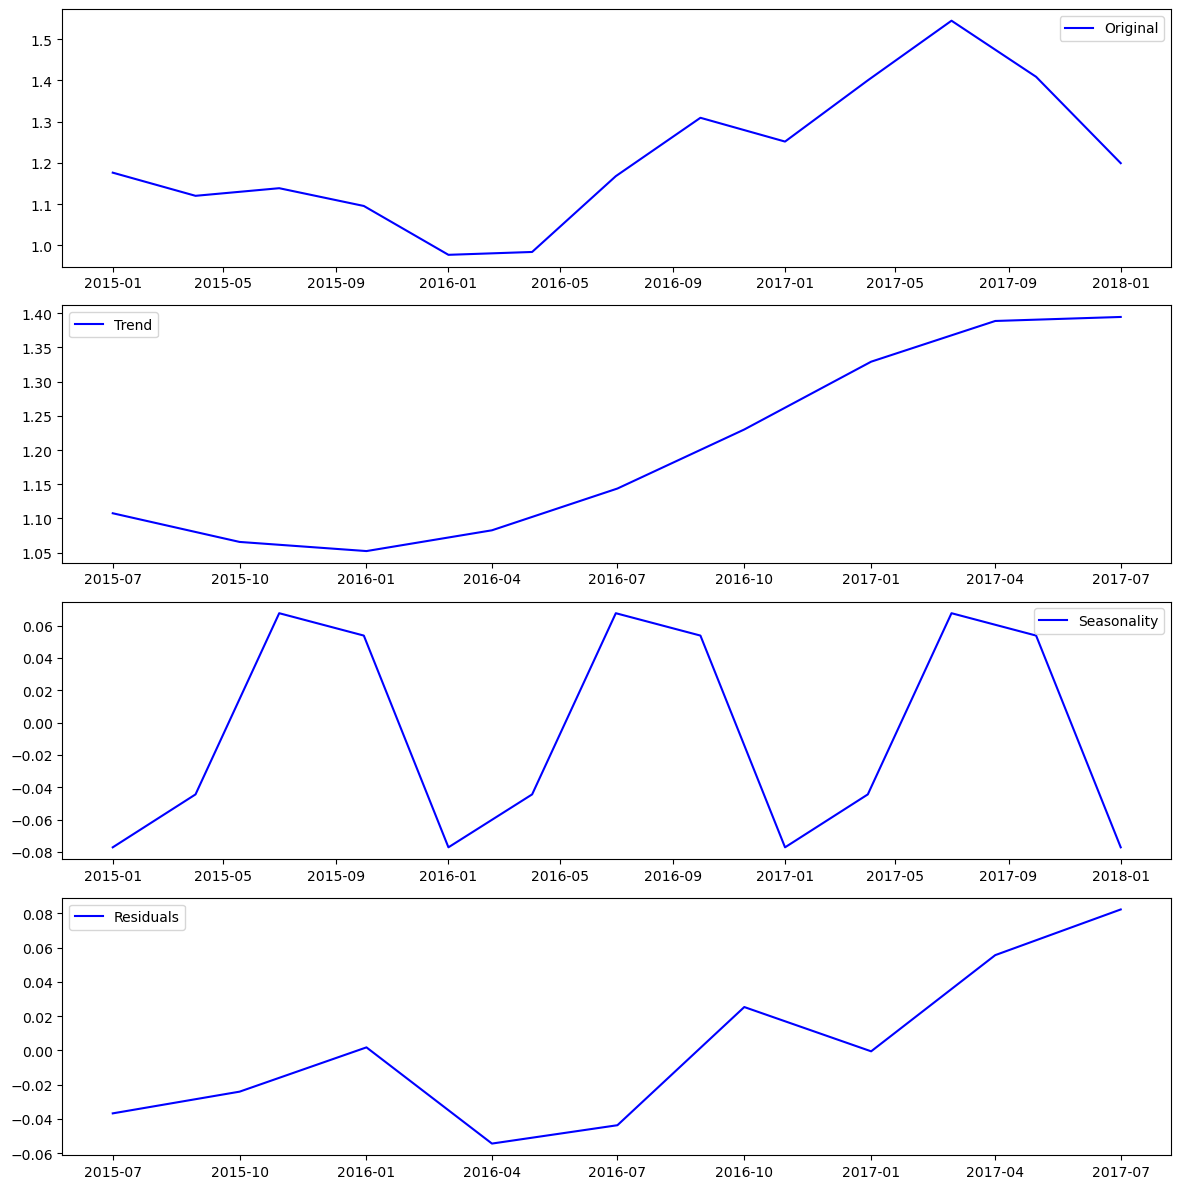

In [11]:
decomposition = sm.tsa.seasonal_decompose(df_quarter, model='additive')

#Gather the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,12))
plt.subplot(411)
plt.plot(df_quarter, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [12]:
df_year = df.copy()
df_year['Year'] = pd.to_datetime(df_year['Date'].dt.year, format='%Y')
df_year = df_year.groupby('Year')['AveragePrice'].mean()
df_year

Year
2015-01-01    1.132500
2016-01-01    1.109423
2017-01-01    1.401321
2018-01-01    1.199167
Name: AveragePrice, dtype: float64

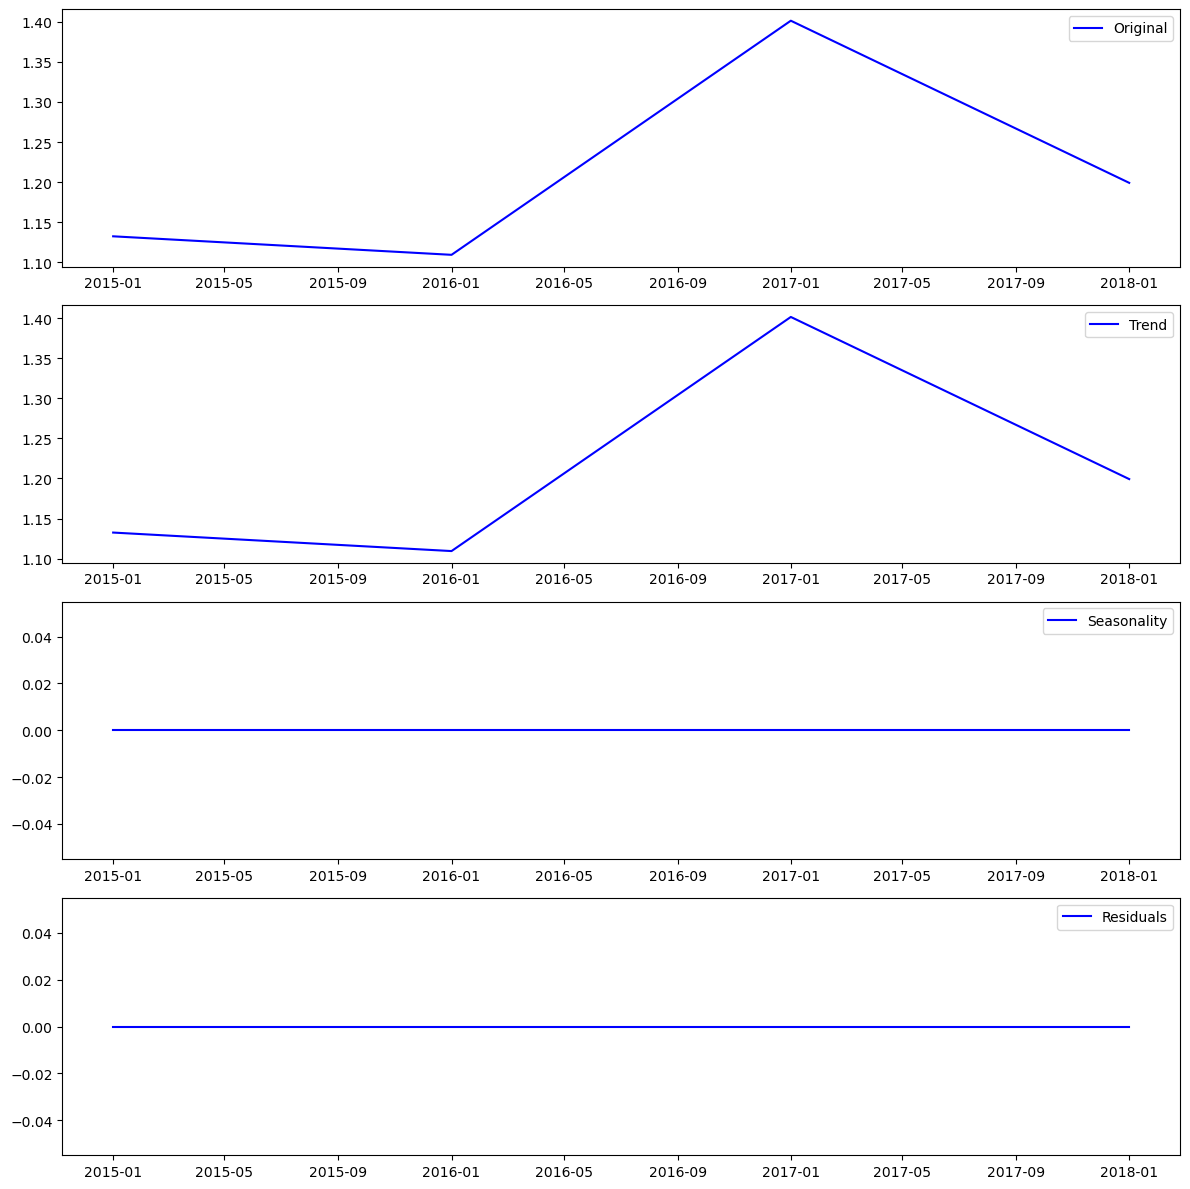

In [13]:
decomposition = sm.tsa.seasonal_decompose(df_year, model='additive')

#Gather the trend, seasonality, and residuals
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,12))
plt.subplot(411)
plt.plot(df_year, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [14]:
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

In [15]:
ts_log_decompose = residual_week
ts_log_decompose.dropna(inplace=True)

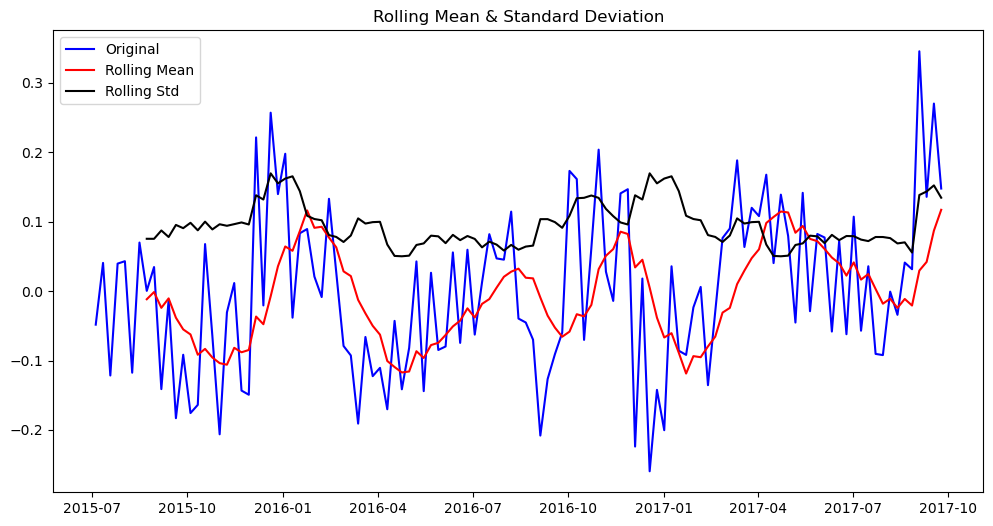

Results of Dickey-Fuller Test: 

Test Statistic                  -3.773093
p-value                          0.003195
#Lags Used                       4.000000
Number of Observations Used    112.000000
Critical Value (1%)             -3.490131
Critical Value (5%)             -2.887712
Critical Value (10%)            -2.580730
dtype: float64


In [16]:
stationarity_check(ts_log_decompose)

p-value < 0.05 => residuals is stationary

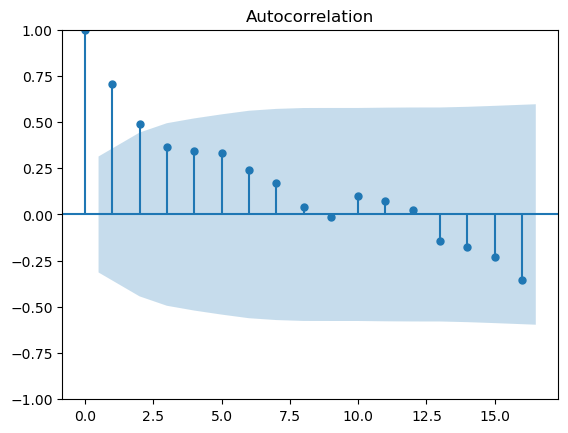

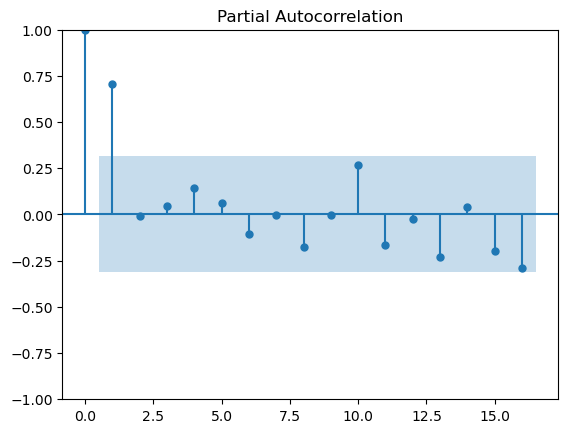

In [17]:
plot_acf(df_month); plt.show()
plot_pacf(df_month); plt.show()

<Axes: xlabel='Date'>

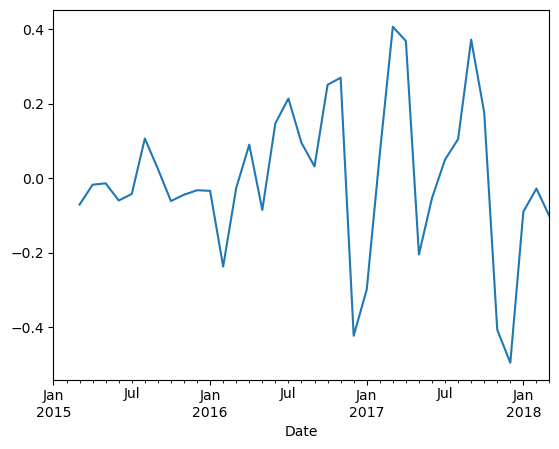

In [18]:
df_month.diff(periods=2).plot()

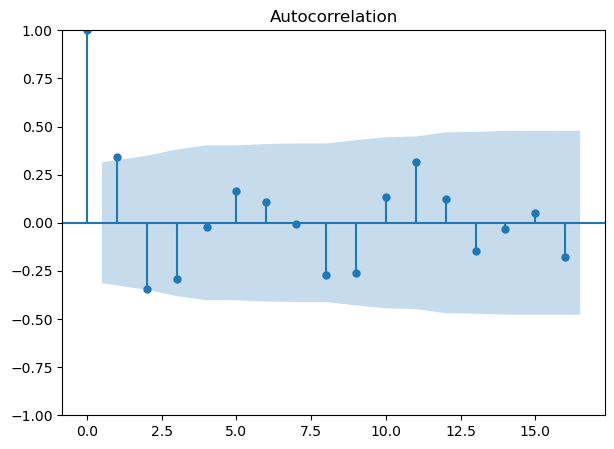

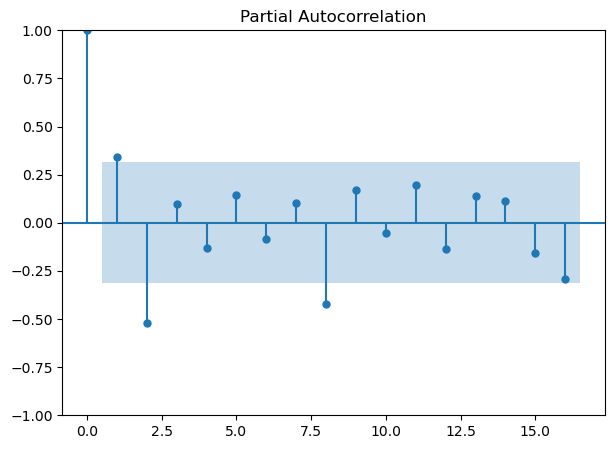

In [19]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize']=7,5
plot_acf(df_month.diff(periods=2).bfill()); plt.show()
plot_pacf(df_month.diff(periods=2).bfill()); plt.show()

* Sau khi đã tách hết các yếu tố seasonal, trend cho từng khoảng thời gian, thì ta thấy có yếu tố seasonal theo năm ở trong dataset. 